# Blackman Window

$$
w[n] = 0.42 - 0.5\cos\Big(\frac{2 \pi n}{N - \mathrm{1}_{symmetric}}\Big)
+ 0.08\cos\Big(\frac{4 \pi n}{N - \mathrm{1}_{symmetric}}\Big)
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as dsp
from scipy import fft
import IPython.display as display
from zplot import zplot
from compare import compare

In [2]:
def blackman(N, sym=False):
    """
    Return a Blackman window.

    Args:
        N: Number of points in the output window. 
        If zero or less, an empty array is returned.
        sym: When True (default), generates a symmetric window, 
        for use in filter design. When False, generates a 
        periodic window, for use in spectral analysis.

    Returns:
        the Blackman window of length N with given symmetry

    """
    n = np.arange(N)
    N = N - 1 if sym else N
    return 0.42 - 0.50 * np.cos(2 * np.pi * n / N) + 0.08 * np.cos(4 * np.pi * n / N)

## Asymmetric

### Odd

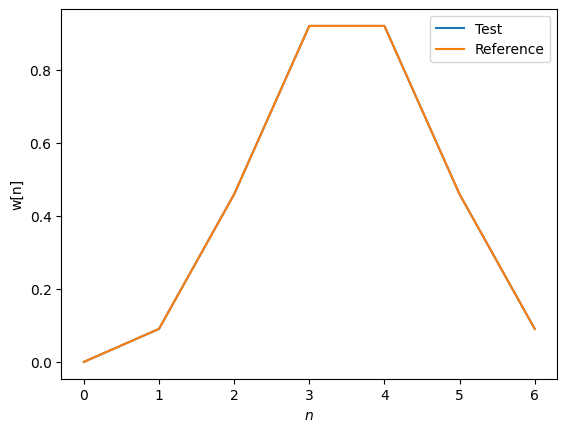

In [3]:
test, reference = compare(7, blackman, dsp.blackman, False)

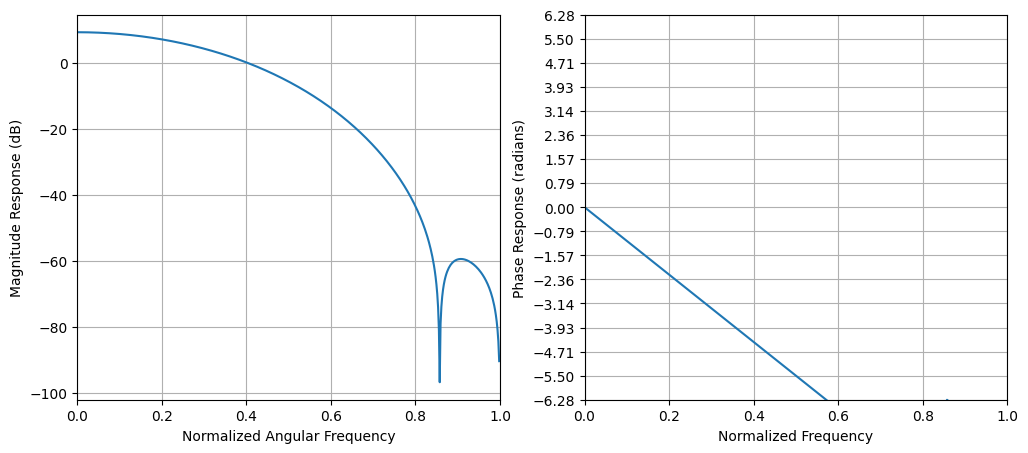

In [4]:
_ = dsp.freqz(test, plot=zplot)

In [5]:
list(test)

[-1.3877787807814457e-17,
 0.09045342435412804,
 0.45918295754596355,
 0.9203636180999081,
 0.9203636180999083,
 0.45918295754596383,
 0.09045342435412812]

In [6]:
list(reference)

[-1.3877787807814457e-17,
 0.09045342435412813,
 0.45918295754596367,
 0.9203636180999082,
 0.9203636180999082,
 0.45918295754596367,
 0.09045342435412813]

### Even

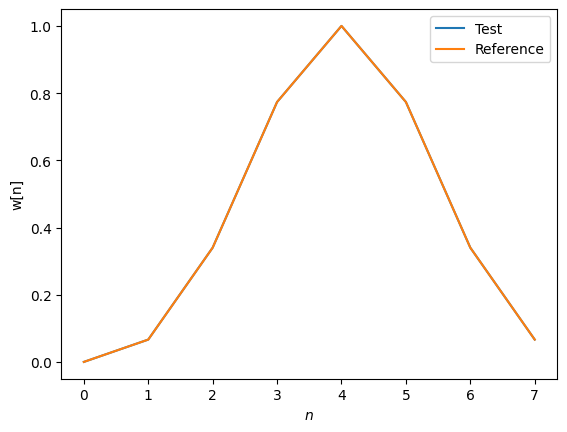

In [7]:
test, reference = compare(8, blackman, dsp.blackman, False)

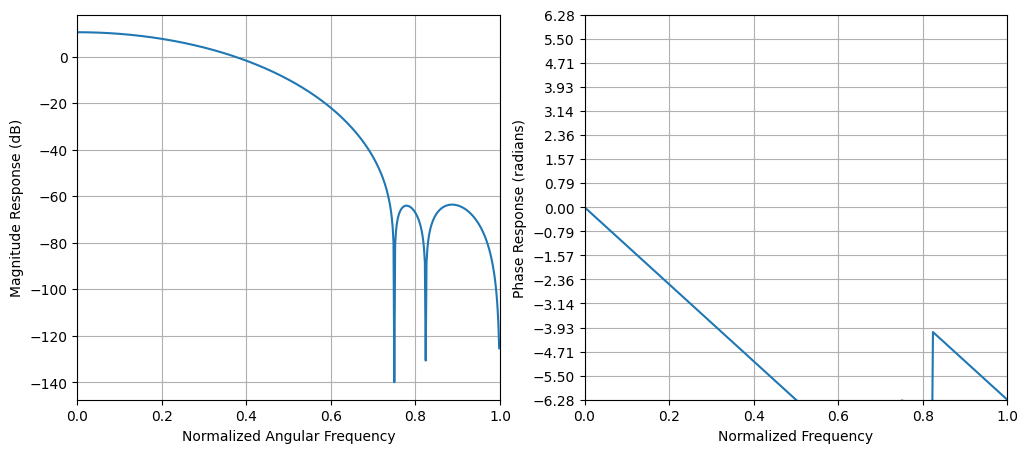

In [8]:
_ = dsp.freqz(test, plot=zplot)

In [9]:
list(test)

[-1.3877787807814457e-17,
 0.0664466094067262,
 0.3399999999999999,
 0.7735533905932737,
 0.9999999999999999,
 0.7735533905932739,
 0.3400000000000001,
 0.06644660940672623]

In [10]:
list(reference)

[-1.3877787807814457e-17,
 0.06644660940672624,
 0.34,
 0.7735533905932738,
 0.9999999999999999,
 0.7735533905932738,
 0.34,
 0.06644660940672624]

## Symmetric

### Odd

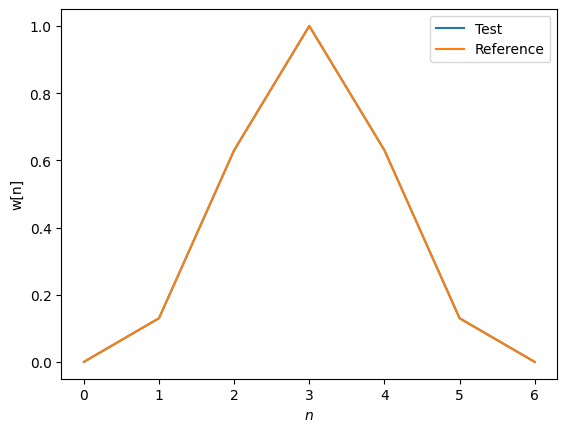

In [11]:
test, reference = compare(7, blackman, dsp.blackman, True)

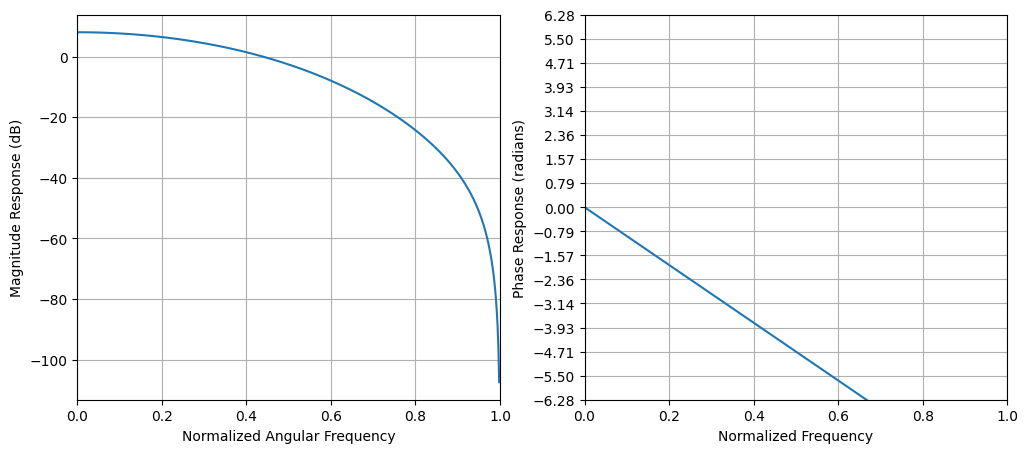

In [12]:
_ = dsp.freqz(test, plot=zplot)

In [13]:
list(test)

[-1.3877787807814457e-17,
 0.12999999999999995,
 0.6299999999999999,
 0.9999999999999999,
 0.6300000000000002,
 0.13,
 -1.3877787807814457e-17]

In [14]:
list(reference)

[-1.3877787807814457e-17,
 0.12999999999999995,
 0.6299999999999999,
 0.9999999999999999,
 0.6300000000000002,
 0.1300000000000002,
 -1.3877787807814457e-17]

### Even

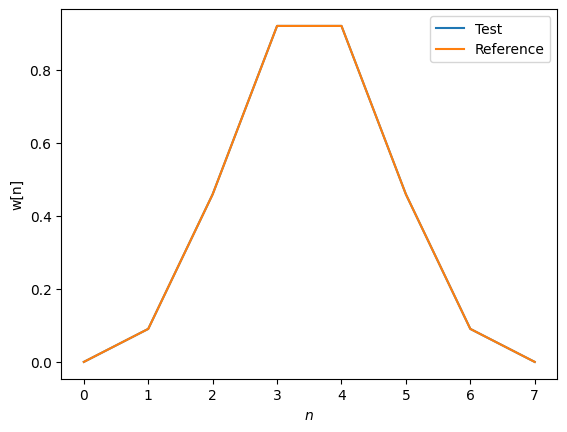

In [15]:
test, reference = compare(8, blackman, dsp.blackman, True)

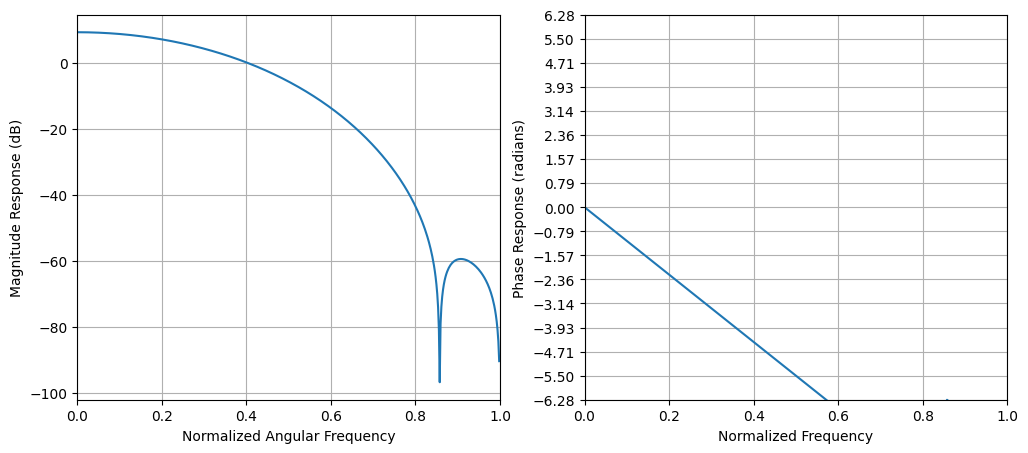

In [16]:
_ = dsp.freqz(test, plot=zplot)

In [17]:
list(test)

[-1.3877787807814457e-17,
 0.09045342435412804,
 0.45918295754596355,
 0.9203636180999081,
 0.9203636180999083,
 0.45918295754596383,
 0.09045342435412812,
 -1.3877787807814457e-17]

In [18]:
list(reference)

[-1.3877787807814457e-17,
 0.09045342435412813,
 0.45918295754596367,
 0.9203636180999082,
 0.9203636180999082,
 0.45918295754596367,
 0.09045342435412813,
 -1.3877787807814457e-17]

## Coherent Gain

In [19]:
blackman(1024, False).mean()

0.42

## Side-lobe amplitude

-58.137667801010146

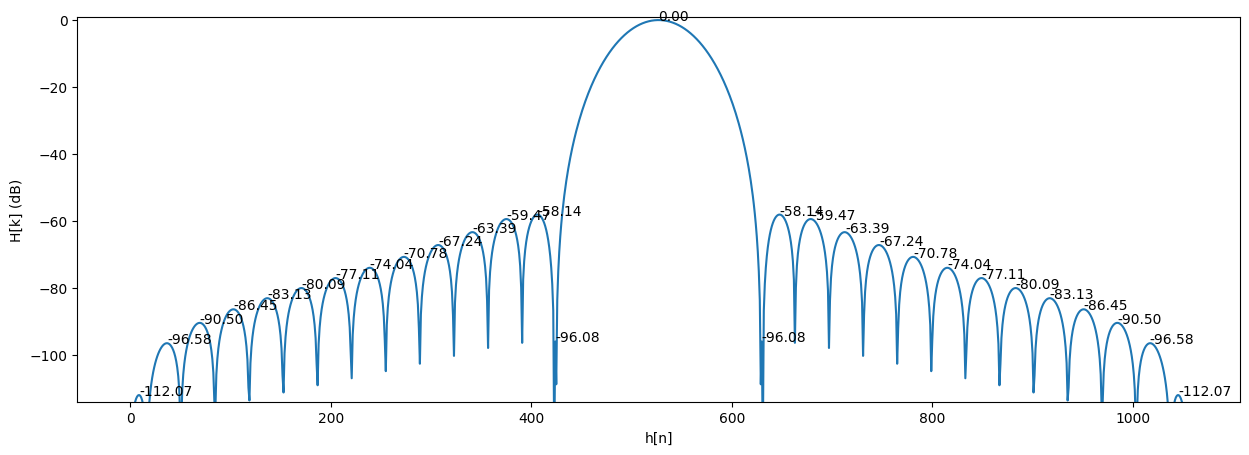

In [20]:
w = blackman(31, False)
w = np.pad(w, (512, 512))
H = fft.fft(w)
H = fft.fftshift(H)
H = 20 * np.log10(np.abs(H) + 1e-12)
H = H - H.max()
peaks, _ = dsp.find_peaks(H)
ymin = H[peaks[len(peaks)//2:]][-1] - 1
plt.figure(figsize=(15, 5))
plt.plot(H)
for x, y in zip(peaks, H[peaks]):
    if y > ymin:
        plt.text(x, y, f'{y:.2f}')
plt.ylabel('H[k] (dB)')
plt.xlabel('h[n]')
plt.ylim(ymin - 1, 1)
sorted(H[peaks], reverse=True)[1]